In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy.optimize import curve_fit 
import glob
import os

plt.style.use(['seaborn-v0_8-dark', 'science'])

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 200
glob.glob('logging/*')


['logging/converted_1_30pm',
 'logging/1_39',
 'logging/debug.log',
 'logging/feb_14']

In [2]:
def model(x, a, x0, s, C):
    return a/np.sqrt(2*np.pi)/s*np.exp(-1/2*(x-x0)**2/s**2) + C

In [16]:
# uncalibrated files
files = sorted(glob.glob('logging/1_39/[0-9]*.csv'))[25:-25]

pos_mm = np.array([float(".".join(os.path.basename(f).split('_')[:2])) for f in files])
e_pos = 100e-6
V = np.array([np.genfromtxt(f, skip_header= 8, dtype = float, 
                        delimiter = ',').mean(axis = 0)[-1] for f in files])

e_V = np.array([np.genfromtxt(f, skip_header= 8, dtype = float, 
                        delimiter = ',').std(axis = 0)[-1] for f in files])



In [17]:
# plt.errorbar(pos_mm, V, xerr = e_pos, yerr= e_V ,fmt = 'ko', ms = .1)
xx = np.linspace(np.min(pos_mm), np.max(pos_mm), 200)
# plt.plot(xx, model(xx, .05, 22.659,.008, .5))

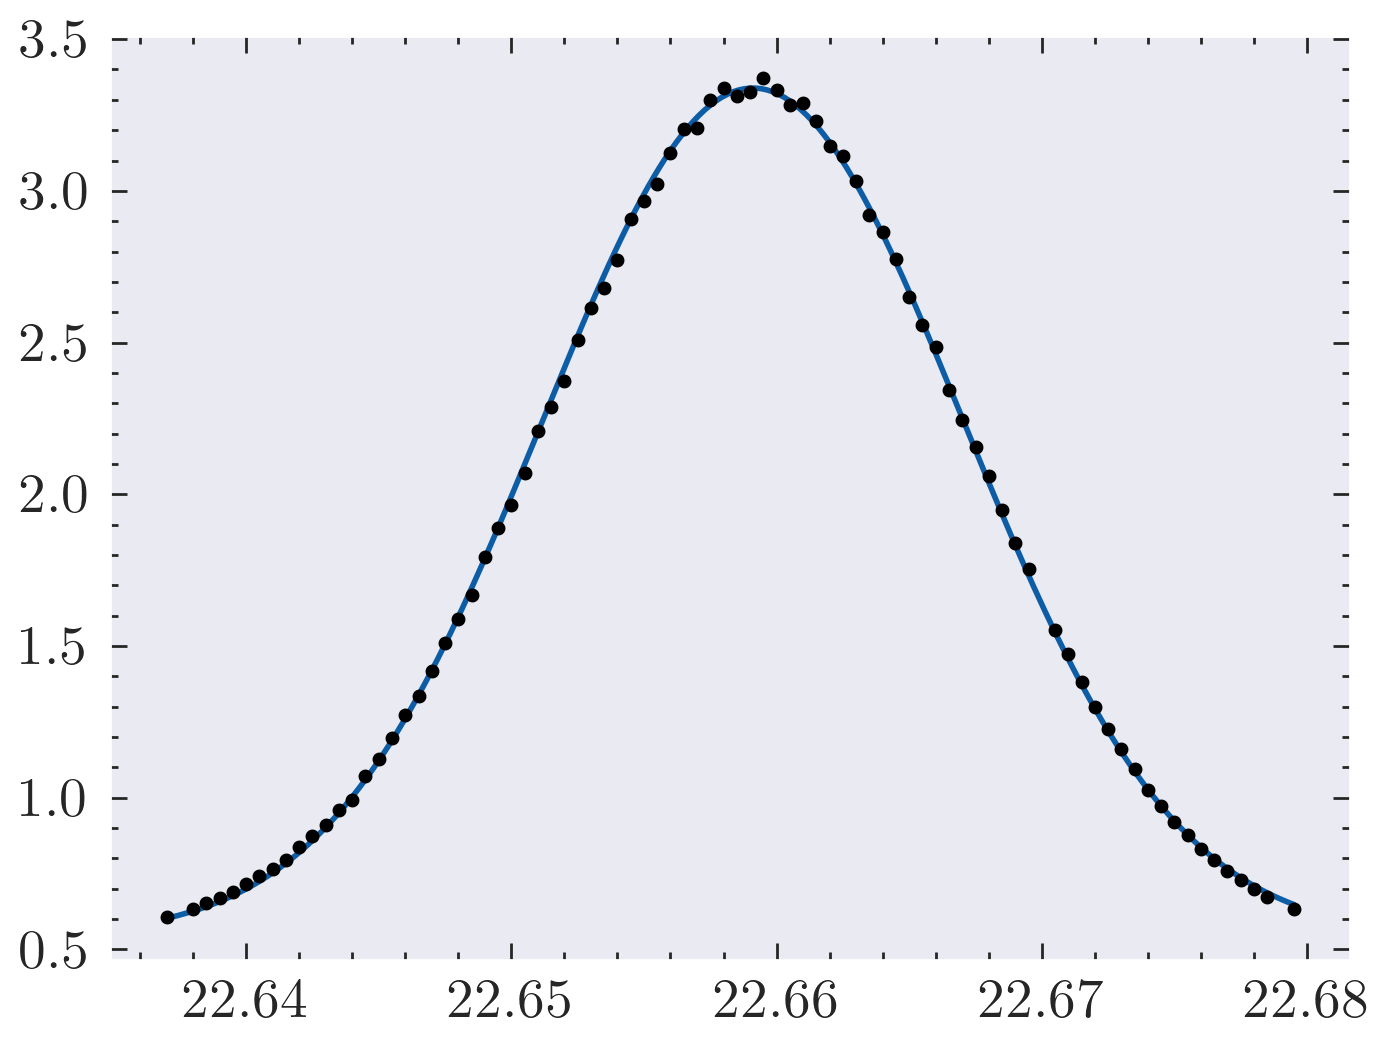

In [18]:
fit, err = curve_fit(model, pos_mm, V, sigma = e_V, absolute_sigma= True,  p0 = [.05, 22.659,.008, .5])
plt.plot(xx, model(xx, *fit))
plt.plot(pos_mm, V,'ko', ms = 1.5)
# plt.text(f'{fit}')

**We measured in delay distance. The time delay is distance change times two. But the signal is twice as wide, in time domain, as the original signal by symmetry!!**

In [19]:
width = fit[-2]/1e3/3e8 /1e-15 * 2 / 2
e_width = np.sqrt(np.diag(err))[-2]/1e3/3e8 /1e-15
print(f'{width:.3f} +/- {e_width:.3f}')

26.492 +/- 0.011


In [20]:
t_fs = (pos_mm - fit[-3])/1e3/2.998e8/1e-15*2
e_t_fs = np.sqrt((e_pos/1e3/2.998e8/1e-15*2)**2 + (np.sqrt(np.diag(err))[-3]/1e3/2.998e8/1e-15*2)**2)

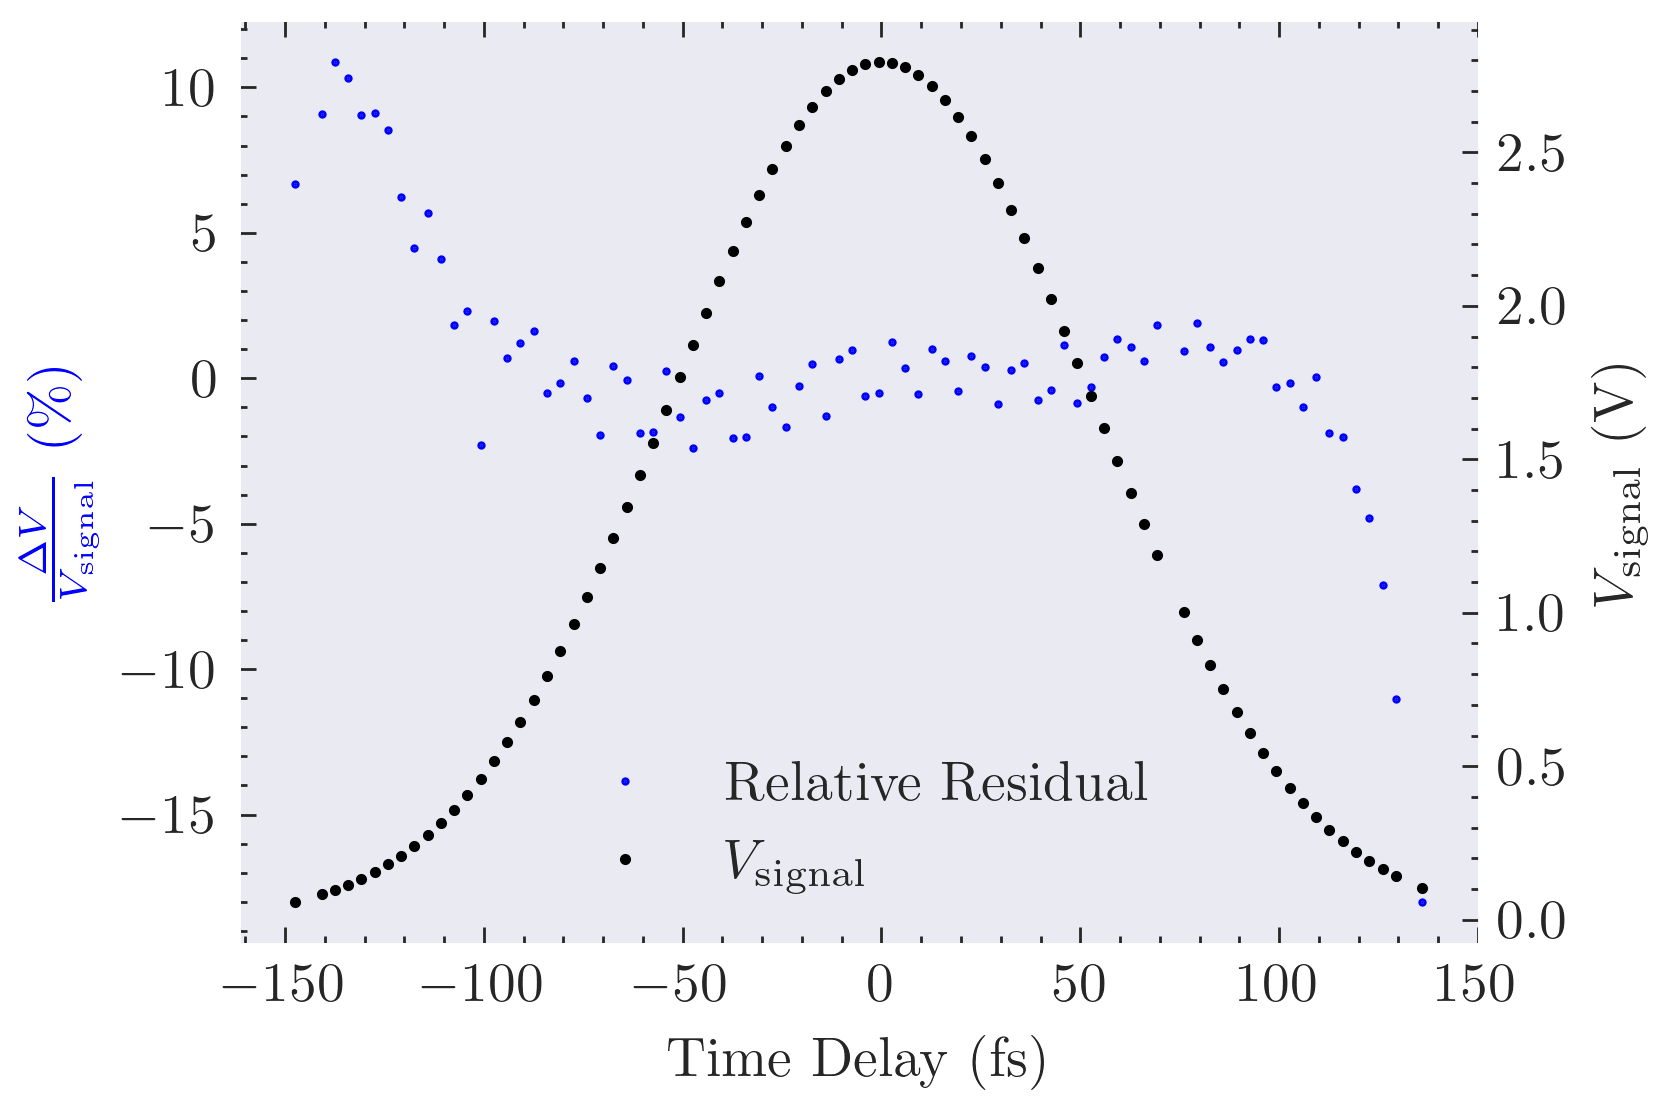

In [21]:
signal = model(pos_mm, *fit[:-1], 0)

ax1 = plt.gca()
line_1 = ax1.plot(t_fs, (V - model(pos_mm, *fit)) / (V- fit[-1]) *100,'b.', label = 'Relative Residual',
                 zorder = -2, ms = 1)

ax1.set_ylabel(r'$\frac{\Delta V}{V_{\mathrm{signal}}}$ (\%)', color = 'b')
# ax1.set_yscale('log')
ax2 = ax1.twinx()


line_2 = ax2.plot(t_fs, signal, ls = 'None', c= 'k', marker= '.', ms = 2
                     , zorder = -2,
                    label ='$V_{\mathrm{signal}}$ ')
ax2.set_ylabel('$V_{\mathrm{signal}}$ (V)')

lines = [line_1[0],line_2[0]]
labs = [l.get_label() for l in lines]

ax1.set_xlabel('Time Delay (fs)')
plt.legend(lines, labs, loc= 8)




We see this asymmetry due to imperfect alignment. But this is good enough?

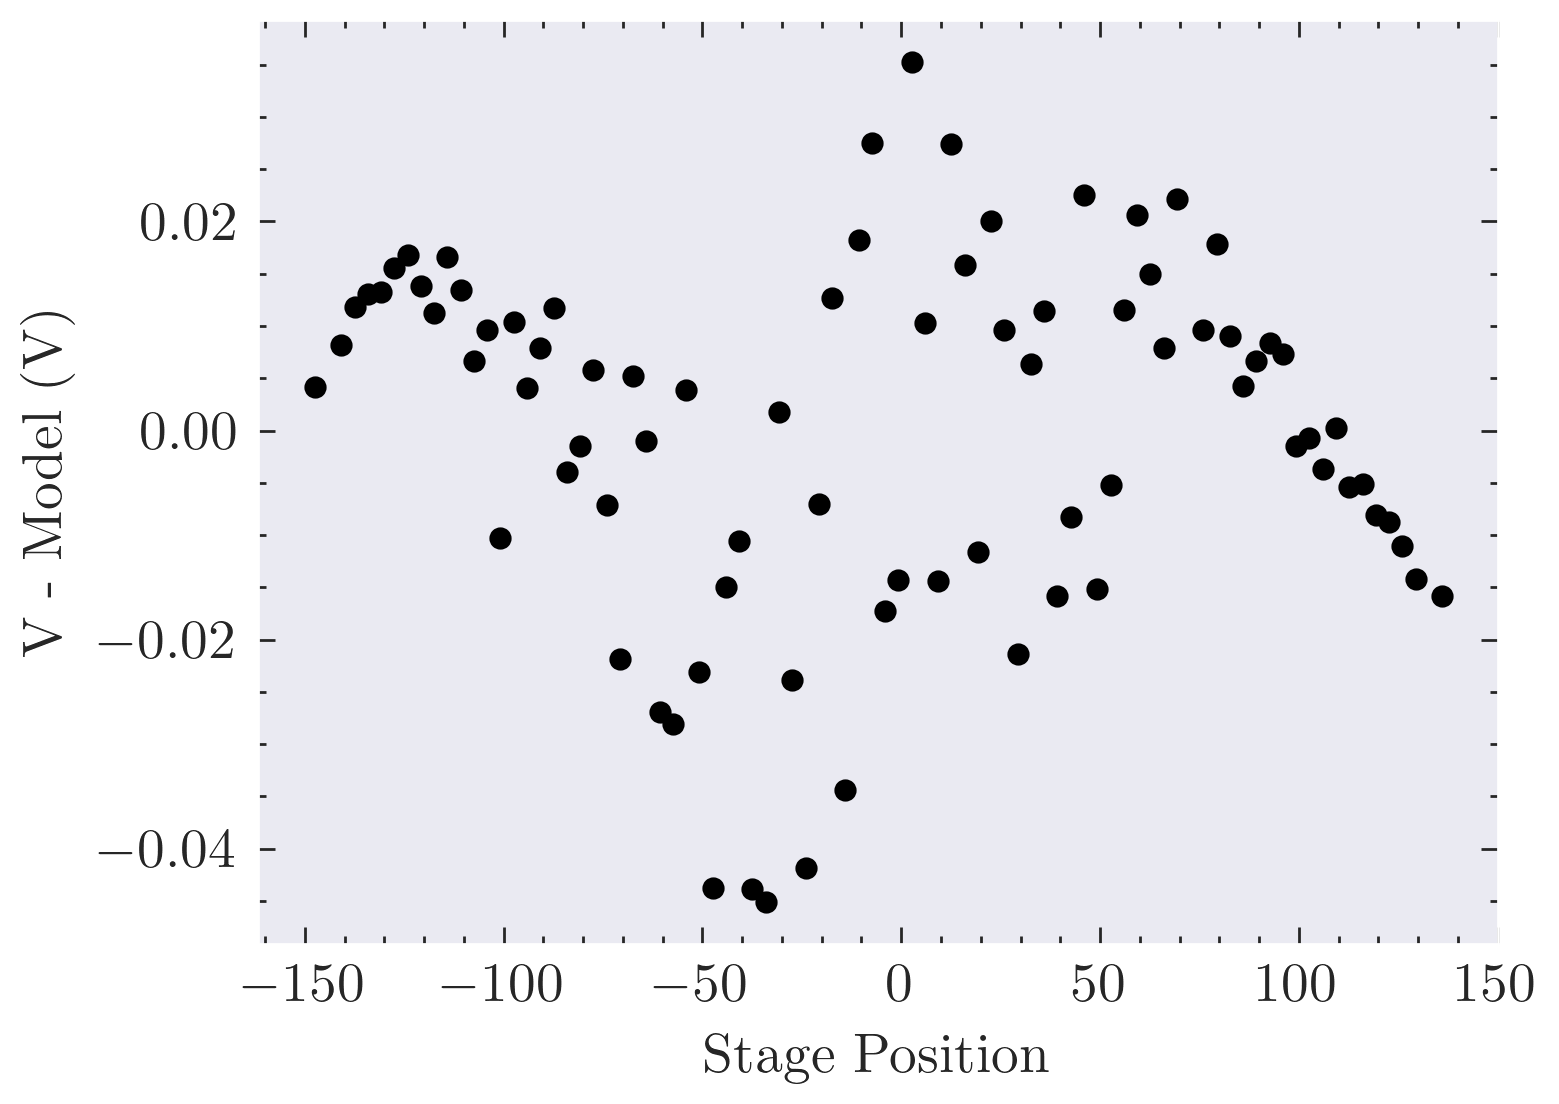

In [23]:
# plt.plot(xx, model(xx, *fit))
# plt.plot(pos_mm, V,'ko', ms = 1.5)
plt.plot(t_fs, V - model(pos_mm, *fit), 'k.')
plt.ylabel('V - Model (V)')
plt.xlabel('Stage Position')
plt.savefig("figures/feb_13_1_39_Res.pdf", dpi =300, bbox_inches = 'tight')

In [10]:
V[np.argmin(np.abs(pos_mm-22.652))]

2.3734061255012224

In [11]:
pos_mm[np.argmin(np.abs(pos_mm-22.652))]

22.652

In [12]:
idx_err = [i for i, f in sorted(zip(np.arange(len(files)), e_V), key=lambda pair: pair[1], reverse = True)]

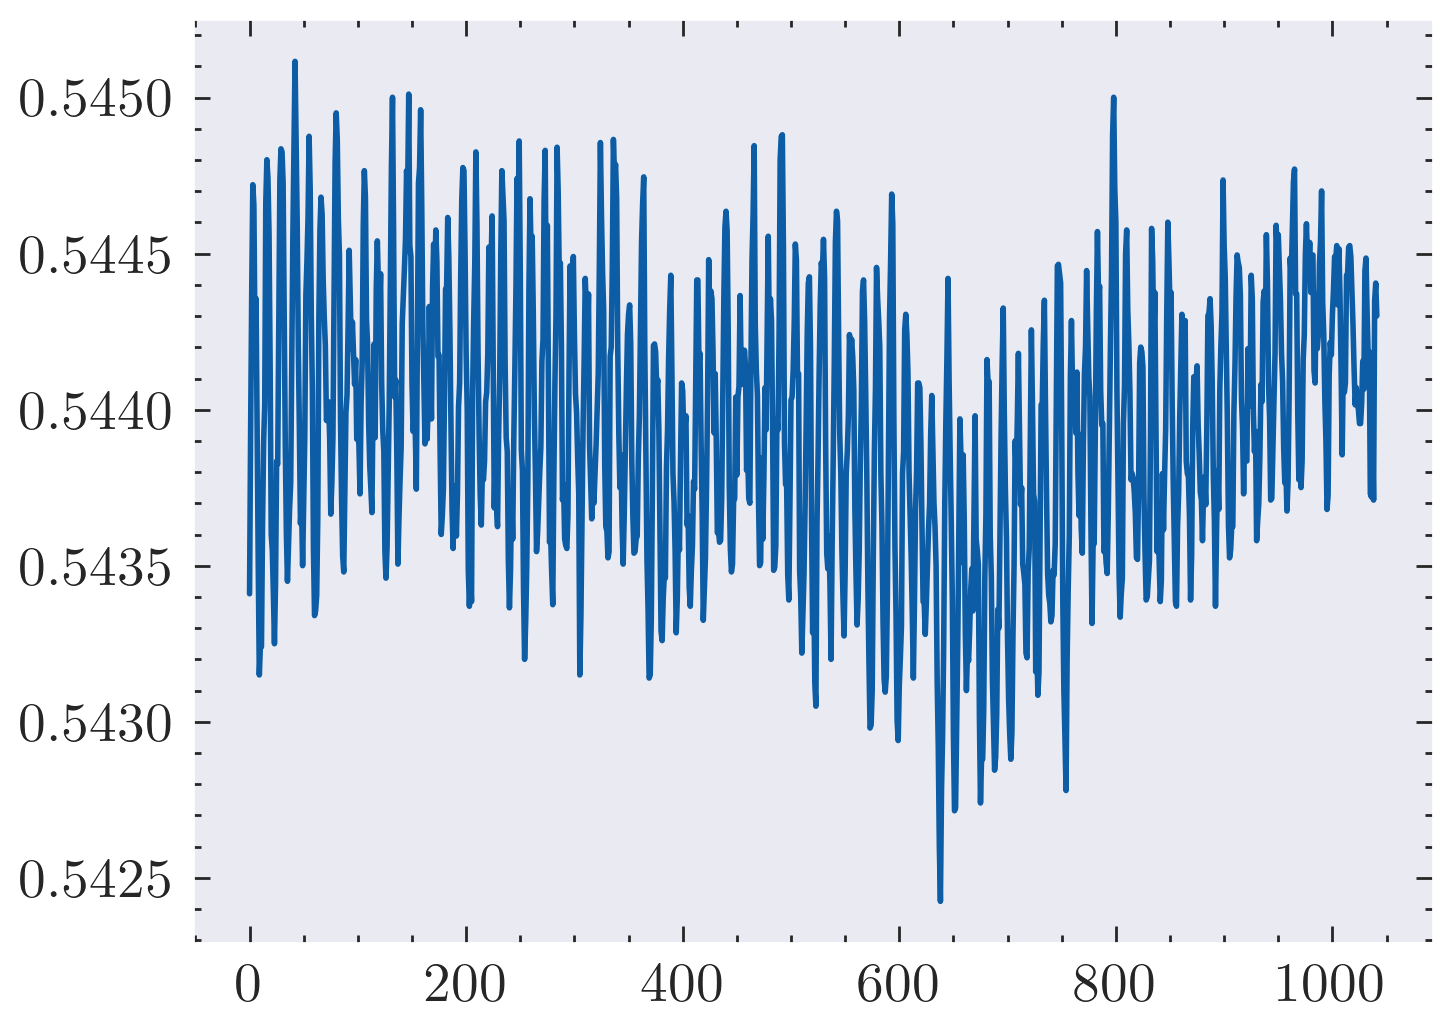

In [13]:
plt.plot(np.genfromtxt(files[idx_err[-2]], skip_header= 8, dtype = float, 
                        delimiter = ',')[:,-1])

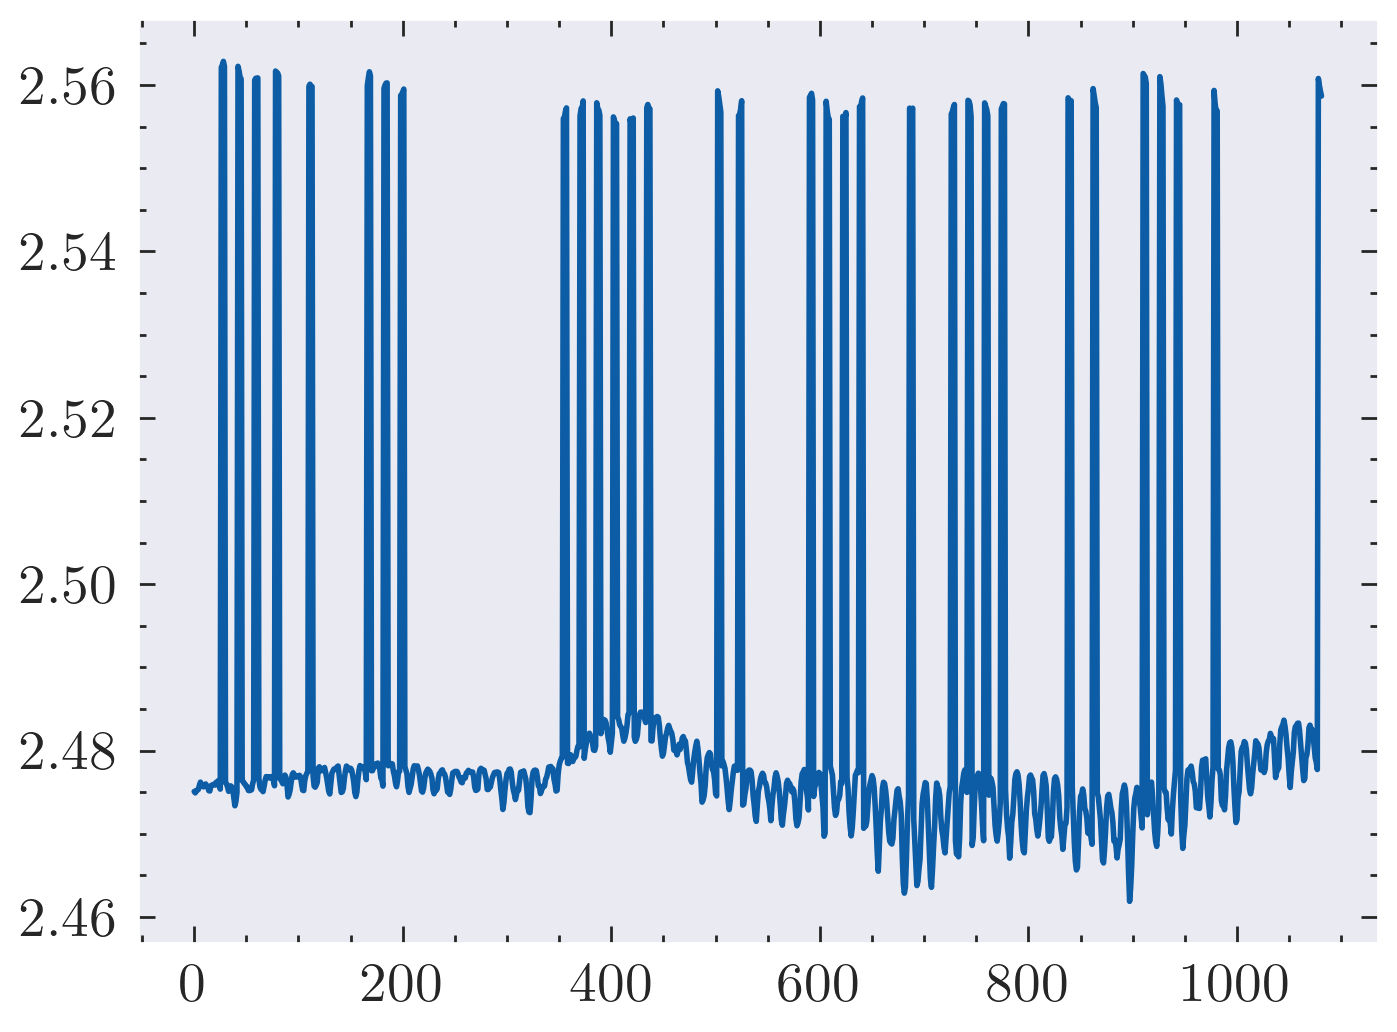

In [14]:
plt.plot(np.genfromtxt(files[idx_err[2]], skip_header= 8, dtype = float, 
                        delimiter = ',')[:,-1])

In [15]:
plt.plot(np.sum(np.abs([np.fft.rfft(np.genfromtxt(f, skip_header= 8, dtype = float, 
                        delimiter = ',')[:,-1]) for f in files]), axis = 0))
plt.yscale('log')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (133,) + inhomogeneous part.

In [ ]:

mask = np.cos(np.linspace(-np.pi/2,np.pi/2, 1000))

In [ ]:
fft = np.fft.rfft(np.genfromtxt(files[idx_err[10]], skip_header= 8, dtype = float, 
                        delimiter = ',')[:,-1][:1000]*mask)
